### Observation : Shifted to pyteserract for OCR Reading since easyOCR was not able to read symbols properly like . \ which is currently cruicial from my use case

In [ ]:
# pip install opencv-python
# !pip install pytesseract
# !pip install wand
# pip install moviepy


In [ ]:
from moviepy.editor import VideoFileClip

# Replace 'input.webm' with the path to your input WebM file
input_file = '"sample dataset.webm'

# Replace 'output.mp4' with the desired output MP4 file name
output_file = 'sample_dataset.mp4'

# Load the WebM video
video_clip = VideoFileClip(input_file)

# Convert and save as MP4
video_clip.write_videofile(output_file, codec='libx264')

print(f"Video converted to {output_file}")


## Easy OCR vs pytesseract for OCR extraction
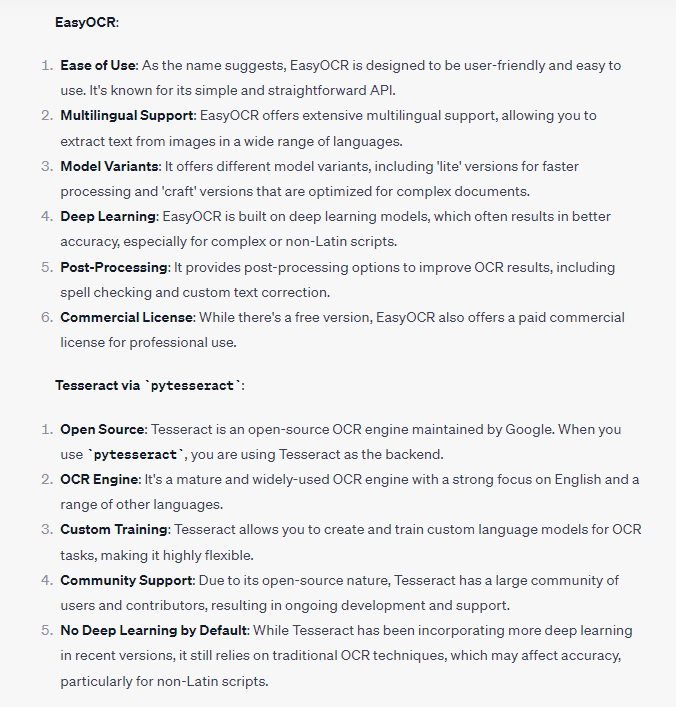
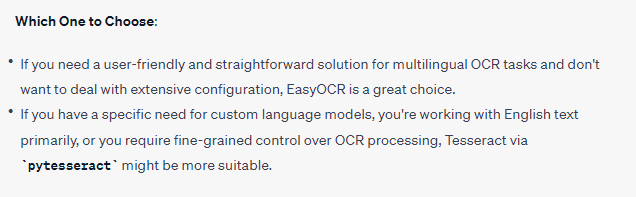

In [1]:
from PIL import Image
import pytesseract
# from wand.image import Image as Img
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import numpy as np
import os
import cv2
image_frames = 'image_frames/'

In [ ]:
import cv2

# Open the video file
video_file = 'How to install any software with cmd as admin.mp4'  # Replace with the path to your video file
cap = cv2.VideoCapture(video_file)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

    
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate (frames per second)
frame_interval = int(frame_rate)

# frame_rate = cap.get(5)  # Get the frame rate (frames per second)
print(frame_rate)
# frame_interval = int(1 / frame_rate)
print(frame_interval)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Save the frame as an image
        frame_filename = './image_frames/'+str(int(frame_count / frame_rate)) +'.png'
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


# text extraction using EasyOCR

In [61]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
reader = easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
temp_list = os.listdir(image_frames)

temp_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
temp_list = [file for file in temp_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
# temp_list

In [4]:
# image_path = os.path.join(image_frames,image)
# print(image_path)

In [5]:
# temp_list[308:325:16]

### Algorithm for how to deal with duplicate data
- selecting first frame as reference frame
- 2nd image for comparison
- if same than extract required content than storing it in temp variable
- checking third frame
     - if simmilar than extracting content and appending to temp varibale
     - if different then appending temp variable to  first frame and moving to other frame and
     - starting fresh operation on that frame
 
 - and so on for next frames
 
 ### Flow to follow for extracted ocr text, 
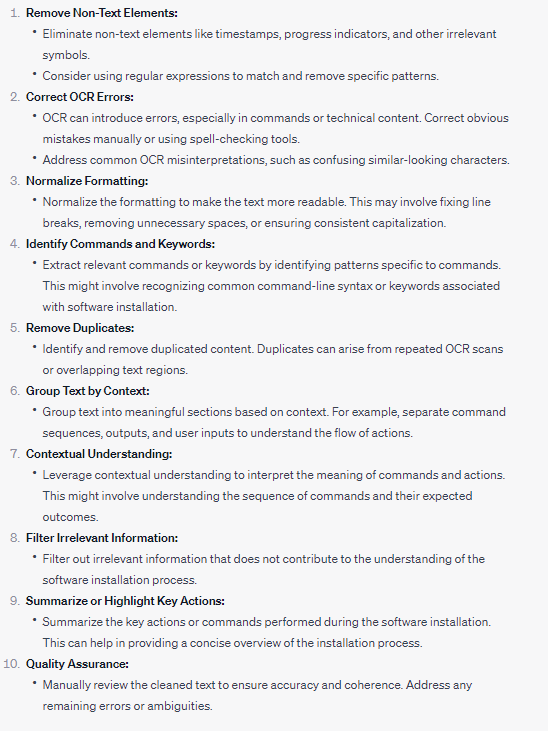

In [6]:
### LCS code

In [7]:
def longest_common_subsequence(X, Y):
    m, n = len(X), len(Y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = m, n
    lcs = []
    while i > 0 and j > 0:
        if X[i - 1] == Y[j - 1]:
            lcs.append(X[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    return " ".join(reversed(lcs))


# main_sentence = """ """
# other_sentence = """You Dat Unc Atte Unc Mir Lar Nat Unt ash ccr < > C 0 amazon in/s?k=rain+water&crid= ZPROALJK3C2O9&sprefix=rain+water"2Caps%2C258&ref-nb_sb_noss Relaunch to updlate Favorites Fowdo steppern_ Raspperry Pi Tutori_ DealeXtreme Cccl; https;/www,course Water Leve Control Projects Working principle Simple Prcximity Se_ Welcomel Welcom  Career Ropotics AIl Bookmarks amazon Deliver to Annu rain water Hello, Maninder Retums Subtotal Sirsa 125055 EN Account & Lists & Orders Cart 7549.00 prime Cart =Al Car & Motorbike Amazon miniTV Sell Baby Health; Household & Personal Care Gift Cards Pet Supplies Subscribe & Save Browsing History Customer Service at Indian Festival SHOP NOW Finale days polDf BOLDRT ZEXEL Snuggling Cloud Rain NeeRain SS 304 Rooftop Rainwater Rainy FL 500 Self-Cleaning Dual RainGain Rainwater Harvesting Filter SPIRY FI ENGINEERS Aqua 5 Micron {549.00 Diffuser; Snuggle Cloud; Raindrop Harvesting Filter; Pack of Intensity Rainwater Harvesting Filter (Stainless Steel Filter Mesh; 75 mm) Dia & 20" Length Bag Bore Water prime Humidifier; Mushroom Waterfall Suitable for Area 5400 Square Filter Lamp, Anxiety and Stress Relief; Feet; Black Installation Kit Great Indian Festival 463 '6,500 300+ bought in month Save extra with No Cost EMI {3,250MRP:43958 (18% off) '2,099 MRP: 42,999 (30%/ off) prime FREE Delivery by Saturday; 11 '26,500 Save extra with No Cost EMI '280MRP: #599 (53% off) Save <35 with coupon November Save extra with No Cost EMI Save 5% with coupon FREE Delivery by Monday, 13 November prime FREE Delivery by Saturday, 11 FREE Delivery by Monday; 13 November for (prime FREE Delivery by Sunday, 12 Prime members November for Prime members November Rain Water Collection By Blake Holliday K FITG18 Mens Raincoat with Hood Rain Cloud Humidifier Water Drip, 2 Rain Water Collection (Foxhole KOHLER Rain Shower Round 203mm UJEAVETTE@ Rain Cloud Humidifier Water Fighter-Rain Coat for Men Humidifier with Essential Oil Homestead Book 11) (Rain Duet); with Katalyst Air- Water Drip Colors Night Light Waterproof Pant and Carrying Diffuser;45Oml Cloud Humidifier by Blake Holliday induction Spray Technology Mushroom Lamp Diffuser Grain Pouch; Navy Blue Rain Drop, Mushroom Humidifier_ (Polished Chrome) Green Kindle Edition *8,099 MRP: 213498 (39% off) {415MRP: =699 (41% otf) 11,124 *0 kindle unlimited Great Indian Festival Save extra with No Cost EMI Free with Kindle Unlimited membership prime Save extra with No Cost EMI "6,450MRP: #8-688 (25% off) Get it Tuesday, 21 November Friday, 24 Learn More https:/ /www amazon in/events greatindianfestivaV&ref_=ine_gw_j23_03_swm/?_encoding-UTF8Rref_=nav_swm_SK= Fridav 24 Movember - Tuesdav 28 ith Ao Cost FM November 10.40 06-11-2023 New? Upto Past Geip"""

# lcs = longest_common_subsequence(main_sentence.split(), other_sentence.split())
# unique_content = " ".join(word for word in other_sentence.split() if word not in lcs)

# print("Longest Common Subsequence:", lcs)
# print("Unique content:", unique_content)

In [8]:
### Removing date time or symbols

In [9]:
import re

def remove_non_text(text, keep_symbols=None):
    # Define a regular expression pattern to match non-text elements, date, and time
    non_text_pattern = r'[^a-zA-Z0-9\s{}]'.format('' if keep_symbols is None else re.escape(''.join(keep_symbols)))

    date_time_pattern = r'\b(?:\d{1,4}[./-])?(?:\d{1,2}[./-]\d{1,4}|\d{1,4}[./-]\d{1,2})[./-]?(?:\d{1,4}|\d{1,2})?\b|\b(?:[0-1]?[0-9]|2[0-3]):[0-5][0-9]\b'
    
    # Combine the patterns using |
    combined_pattern = f'{non_text_pattern}|{date_time_pattern}'
    
    # Use re.sub to replace non-text elements, dates, and times with an empty string
    cleaned_text = re.sub(combined_pattern, '', text)
    
    return cleaned_text

# # Example usage
# # original_text = "Computer Local Disk (D:) Softwares Seoich Softwares Organize Open E-mail Burn Ncw foldec Favontes Vievt Desktop Downloads Recent Places Tor Browser Interni Libraries Downld Documents Vuze Downloads Documents SSH, Telnet Rlogin client pen Windows USB DVD Dovnloads Tool Computer Control Panel Devices Printers Default Support AII [Szarch progroms ond files Shut down B/s .i Hep"
symbols_to_keep = ['!','.','\\','/','>','<','(',')']  # Add any symbols you want to keep in this list
# cleaned_text = remove_non_text(original_text, keep_symbols=symbols_to_keep)

# print("Original Text:", original_text)
# print("Cleaned Text:", cleaned_text)


In [10]:
from spellchecker import SpellChecker

def correct_ocr_errors(text):
    # Initialize SpellChecker
    spell = SpellChecker()

    # Split the text into words
    words = text.split()

    # Identify misspelled words
    misspelled = spell.unknown(words)

    # Correct misspelled words
    corrected_text = ' '.join(spell.correction(word) if word in misspelled and spell.correction(word) is not None else word for word in words)

    return corrected_text

# Example usage
ocr_text = "untitled notepad file edit format view help hi inow showyou how instal 64tt recycle bin now open admin 000 kb/s  am 000 kb/5 f jll 30scp14"
corrected_text = correct_ocr_errors(ocr_text)

print("OCR Text:", ocr_text)
print("Corrected Text:", corrected_text)


OCR Text: untitled notepad file edit format view help hi inow showyou how instal 64tt recycle bin now open admin 000 kb/s  am 000 kb/5 f jll 30scp14
Corrected Text: untitled notepad file edit format view help hi know showyou how install butt recycle bin now open admin 000 kids am 000 kb/5 i all 30scp14


## 1st method of OCR Data Extraction and mantaining only unique content

In [18]:
current_frame = 0
final_string = ''
for image in temp_list[:1]:
    if len(final_string) == 9999999:
        final_string = ''
    image_path = os.path.join(image_frames,image)
    print(image_path)
    result = reader.readtext(image_path)
    result = np.take(np.array(result), indices=[1], axis=1)
    result =  '\n'.join(item[0] for item in result)
    print(result)
    lcs = longest_common_subsequence(final_string.split(), result.split())
    unique_content = "\n".join(word for word in result.split() if word not in lcs)
#     print(unique_content)
    unique_content = unique_content.lower()
    unique_content = remove_non_text(unique_content, keep_symbols=symbols_to_keep)
#     unique_content = correct_ocr_errors(unique_content)
    print(unique_content,end='\n')
    if unique_content in final_string:
        continue
    else:
        final_string = final_string + ' '+ unique_content
        with open('test_storage.txt','a',encoding='utf8') as f:
            f.write(unique_content+'\n')
    
#     print(result)
    print('-_'*30)

image_frames/0.png


C:\Users\10710548\AppData\Local\Temp\ipykernel_7236\3460112914.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.take(np.array(result), indices=[1], axis=1)


flipkart bxt
Untitled
Notepad
android tt
File
Edit
Format
Vev"
Help
Hi
guys
Now
going
to
show you
How to
instal]
any
program using cmd
as admin
64,tt
Recycle Bin
NOw
going
to
install
teamviewer
1
Open
cmd
as Admin
0.11 kBIs
8.46 AM
p 0 Ml 4
0.13kBls
30-Scp-14
flippant but untitled notepad android to file edit format vet help hi guys now going to show you how to install any program using cod as admin butt recycle bin now going to install teamviewer 1 open cod as admin kris am i 0 my 4 0.13kbls 30scp14
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_


## 2nd method of OCR Data Extraction and mantaining order (using region of interest)

In [60]:
import cv2
import numpy as np
import easyocr

def overlap_frames_and_extract_text(frame1, frame2):
    # Resize frames to have the same width
    height1, width1, _ = frame1.shape
    height2, width2, _ = frame2.shape
    min_height = min(height1, height2)
    target_width = min(width1, width2)

    frame1_resized = cv2.resize(frame1, (target_width, min_height))
    frame2_resized = cv2.resize(frame2, (target_width, min_height))

    # Overlap the resized frames horizontally
    combined_frame = np.concatenate((frame1_resized, frame2_resized), axis=1)

    # Perform OCR on the combined frame
    reader = easyocr.Reader(['en'])
    result = reader.readtext(combined_frame,detail = 0, paragraph=False,width_ths=1.0,
                        text_threshold=0.1,add_margin=0.3)

    # Extract text from the OCR result
#     extracted_text = [text_info[1] for text_info in result]

    return combined_frame, extracted_text

# Example frames (replace with actual frames from your video)
frame1 = cv2.imread('sample_image_cmd.JPG')
frame2 = cv2.imread('sample_image_cmd1.JPG')

# Overlap frames and extract text
combined_frame, extracted_text = overlap_frames_and_extract_text(frame1, frame2)

# Print the extracted text
print("Extracted Text:")
for text in extracted_text:
    print(text)

# Display the combined frame (for visualization purposes)
cv2.imshow('Combined Frame', combined_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text:
Command Promi
Command Promot
Microso
Aidcs
Version
79045
367n
Microsoft Windows [Version
19045.3570]
Ce
Microsott
Corom
Jo
AA
rights
e
(c) Microsoft Corporation.
All rights reserved.
~Users 10710548,Din
Jnsta
Detessefat
Requirement
already
satislied;
pytesseract
Ausers 10710548
A
Aproci
'thon python39
~packares
10)
install
pean
eade
satisfied
Pi
Aset
797iac
appda
Iprogram
A
Adtk
Zo luk
Jte
packages
tr
pytesseract)
IUsers1 10710548>pip
pytesseract
Requi
ement
already
satislied
packacinc>
Jusers 10710548
appda
local prorrams pvthon pvthon39 lib <i
ackares
(rom
pvt
ser
22+59.2183)
Requirement
lready satisfied: pytesseract in €: lusers|10710548lappdata| localIprograms Ipython Ipython39 libIsite-packages (0.3.10)
peami
ement
eedde
satisfied
pyparsing!
-5,>
Tusers 10710548 appdata local programs  python python39 libisite
packages
Fftotr
packaging>
21 .
>pytesseract)
in
c:lusers| 10710548lappdata
Alocallprograms Ipython Ipython39 liblsite-packages (from pytesseract) (9
0)
|
el

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [50]:
# for image in temp_list[99:100]:
#     if len(final_string) == 9999999:
#         final_string = ''
image_path = 'sample_image_cmd.JPG'
print(image_path)
result = reader.readtext(image_path,detail = 0, paragraph=False,width_ths=1.0,
                        text_threshold=0.3)
result1 = reader.readtext(image_path,detail = 0, paragraph=False,width_ths=1.0,
                        text_threshold=0.1,add_margin=0.3)
#     result = np.take(np.array(result), indices=[1], axis=1)
#     result =  '\n'.join(item[0] for item in result)
print(f'Result Default : {result}')
print('_-'*30)
print(f'Result Tested : {result1}')

sample_image_cmd.JPG
Result Default : ['c Command Prompt', 'Microsoft Windows [Version 10.0.19045.3570]', '(c) Microsoft Corporation. All rights reserved', 'C:|Users|10710548>pip install pytesseract', 'Requirement already satisfied: pytesseract in €: lusers|10710548|appdata| locallprograms Ipython python39 liblsite-packages (0.3.10)', 'Requirement already satisfied: Pillow>-8.0.0 in €: lusers|10710548 appdata| locallprograms Ipython Ipython39 lib site-packages (from pytesseract) (9.4.0)', 'Requirement already satisfied: packaging -21.3 in €: lusers|10710548 appdata| local Iprograms Ipython Ipython39|lib|site-packages (from pytesseract) (21.3)', 'Requirement already satisfied: pyparsing!=3.0.5,2-2.0.2 in €: lusers |10710548 appdata| localIprograms Ipython Ipython39|liblsite-packages (from packaging -21.3->pytesseract) (3.0.9)', '[notice] A new release of pip is available: 23.0', '23.3.1', '[notice] To update, run: python.exe', 'pip install --upgrade pip', 'C:IUsers|10710548>', 'C:lUsers

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from difflib import SequenceMatcher
# import numpy as np

# # Function to preprocess and tokenize text
# def preprocess_text(text):
#     stop_words = set(stopwords.words('english'))
    
#     words = word_tokenize(text)
#     words = [word.lower() for word in words if word.isalnum()]
#     words = [word for word in words if word not in stop_words]
    
#     return " ".join(words)

# # Function to calculate the similarity ratio using SequenceMatcher
# def similarity_ratio(s1, s2):
#     return SequenceMatcher(None, s1, s2).ratio()

# # Function to extract unique and important information from frames
# def extract_unique_information(frames, n_gram=2):
#     # Preprocess and tokenize each frame
#     processed_frames = [preprocess_text(frame) for frame in frames]

#     # Calculate tf-idf scores for each n-gram in the frames
#     vectorizer = TfidfVectorizer(ngram_range=(n_gram, n_gram))
#     tfidf_matrix = vectorizer.fit_transform(processed_frames)

#     # Find the most important n-grams based on tf-idf scores
#     feature_names = np.array(vectorizer.get_feature_names_out())
#     important_ngrams = set()

#     for i, frame in enumerate(frames):
#         frame_ngrams = preprocess_text(frame).split()
#         for ngram in frame_ngrams:
#             if ngram in feature_names:
#                 index = np.where(feature_names == ngram)[0][0]
#                 if tfidf_matrix[i, index] > 0.2:  # Adjust the threshold as needed
#                     important_ngrams.add(ngram)

#     return important_ngrams

# frames = [

# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw exe 05-Dec-13 11.04 0,05 B/s
# """,
# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw col system: exe 05-Dec-13 11.04
# """,
# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw copy system: exe 05-Dec-13 11.04 0,10 0,07
# """,
# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw copy file system: exe 05-Dec-13 11.04 0,49 Brs 0,61 Ml
# """,
# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw copy file pathl system: exe 05-Dec-13 11.04 Brs Ml
# """,
# """Softwares Seorch Sofhwares Organize E-mail Burn New folder Favontes Viev} Desktop Downloads Recent Places Tor Browser Internf Libraries Downle Documents Ja Buid | Music Pictures Videos Homegroup 2. NOw copy file pathl system: exe 05-Dec-13 11.04 Brs 30-Scp-14
# """
# ]

# unique_information = extract_unique_information(frames)
# print("Unique Information:")
# print(" ".join(unique_information))


### Comparing two frames and extracting unique Content from it 
# Below : 
- ### First the Algorithms to consider for required use case is Mentioned
- ### Then The Observation by implementing those Algorithms for my requied use case is written
- ### Note: The Code for these tested algorithms are in the other notebook named <u>*Tested Algorithms but not implemented*</u> (For testing algorithms and comparison fast, these algorithms are generated using ChatGPT) 

## Algorithms Option 1
<!-- ![image.png](attachment:image.png) -->
https://stackoverflow.com/questions/15303631/what-are-some-algorithms-for-comparing-how-similar-two-strings-are

# Algorithms Options 2 
- **Smith-Waterman Algorithm:** This is a local sequence alignment algorithm used in bioinformatics for comparing DNA, RNA, or protein sequences.

- **Sørensen-Dice Coefficient:** It is used for comparing the similarity between two sets by measuring the size of their intersection relative to the size of the sets themselves.

- **N-grams:** You can break down strings into n-grams (substrings of length n) and then compare the n-grams to measure similarity.

- **Longest Common Subsequence (LCS):** It's used to find the longest subsequence that two sequences have in common. This is useful for finding common elements in strings.

## Observations

### I used Chat GPT to generate above algorithms and check for my required use case to add only unique content to existing sentence and made the following observations:
- *smith-waterman algorithm* : <u>It does not gave any result for unique sequence</u> and the **reason is** The Smith-Waterman algorithm is a sequence alignment algorithm designed for comparing sequences with gaps. However, it's typically used for biological sequences and might not be the best choice for general text comparison tasks.
- *Both n-gram and Sorensen-Dice Coefficient:* <u>were not mantaining the order of words and giving random order in unique value output</u> and **reason is** Both n-grams and Sørensen-Dice coefficient methods do not maintain the order of the content, and they focus on identifying common substrings or n-grams between the sentences. Therefore, they may not be suitable for extracting unique content if the order of words is important. These methods are based on set or substring matching and do not take into account the sequence of words.

- *Longest Common Subsequence(LCS) :* <u>was only giving the proper output for unique content</u> but the limitation which I am facing is that if once a word is there in unique content then it is not again comming in the unique content list

# ---------------------------------------------------------------------------------------------------

#  langchain and ml model to extract the summary 

 **Important :** Since after extracting all the data from the video using OCR and it is stored in a text file, there is very high posibility that the data will be too lengthy in length that when we will go towards extracting summary, we might face up token limit exceed error.
#### To overcome this issue we can try <u>Map Reduce method</u> : in this method we take summary of smaller chunks and then the summary of those summarries and so on... thus overcoming the issue of max-token length